In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
comm = pd.read_csv("Comcast_telecom_complaints_data.csv")
comm.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
comm['Date_index'] = comm['Date_month_year'] + " " + comm['Time']
comm['Date_index'] = pd.to_datetime(comm['Date_index'])
comm.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_index
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [4]:
comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
 11  Date_index                   2224 non-null 

In [5]:
comm['Date_month_year'].value_counts()

24-Jun-15    218
23-Jun-15    190
25-Jun-15     98
26-Jun-15     55
30-Jun-15     53
            ... 
05-Dec-15      7
05-Feb-15      7
04-May-15      6
04-Nov-15      5
05-Mar-15      5
Name: Date_month_year, Length: 91, dtype: int64

In [6]:
comm['Date_month_year'] = pd.to_datetime(comm['Date_month_year'])
comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
 11  Date_index                   2224 non-null 

# Trend chart for the number of complaints Daily granularity levels 

<AxesSubplot:>

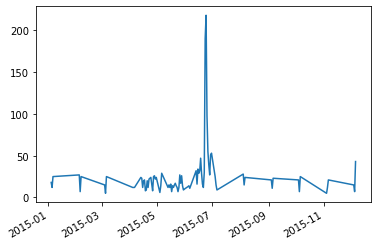

In [7]:
comm['Date_month_year'].value_counts().plot()

# Monthly trend chart

Date_index
2015-01-31     55
2015-02-28     59
2015-03-31     45
2015-04-30    375
2015-05-31    317
Freq: M, dtype: int64


<AxesSubplot:xlabel='Date_index'>

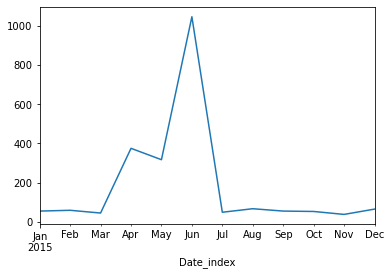

In [8]:
tchrt = comm.groupby(pd.Grouper(key="Date_index",freq='M')).size()
print(tchrt.head())
tchrt.plot()

In [9]:
comm['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [10]:
comm['New_Status'] = ["Open" if i=="Open" or i=="Pending" else "Closed" for i in comm['Status']]
comm.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_index,New_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


In [11]:
x = comm.groupby(by="State").size().sort_values(ascending=False).to_frame().reset_index().rename({0:"Count"},axis=1)
x

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [12]:
Status_complaints = comm.groupby(["State","New_Status"]).size().unstack().fillna(0)
Status_complaints

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


# Stacked barplot for Complaint Status wrt States

<AxesSubplot:ylabel='State'>

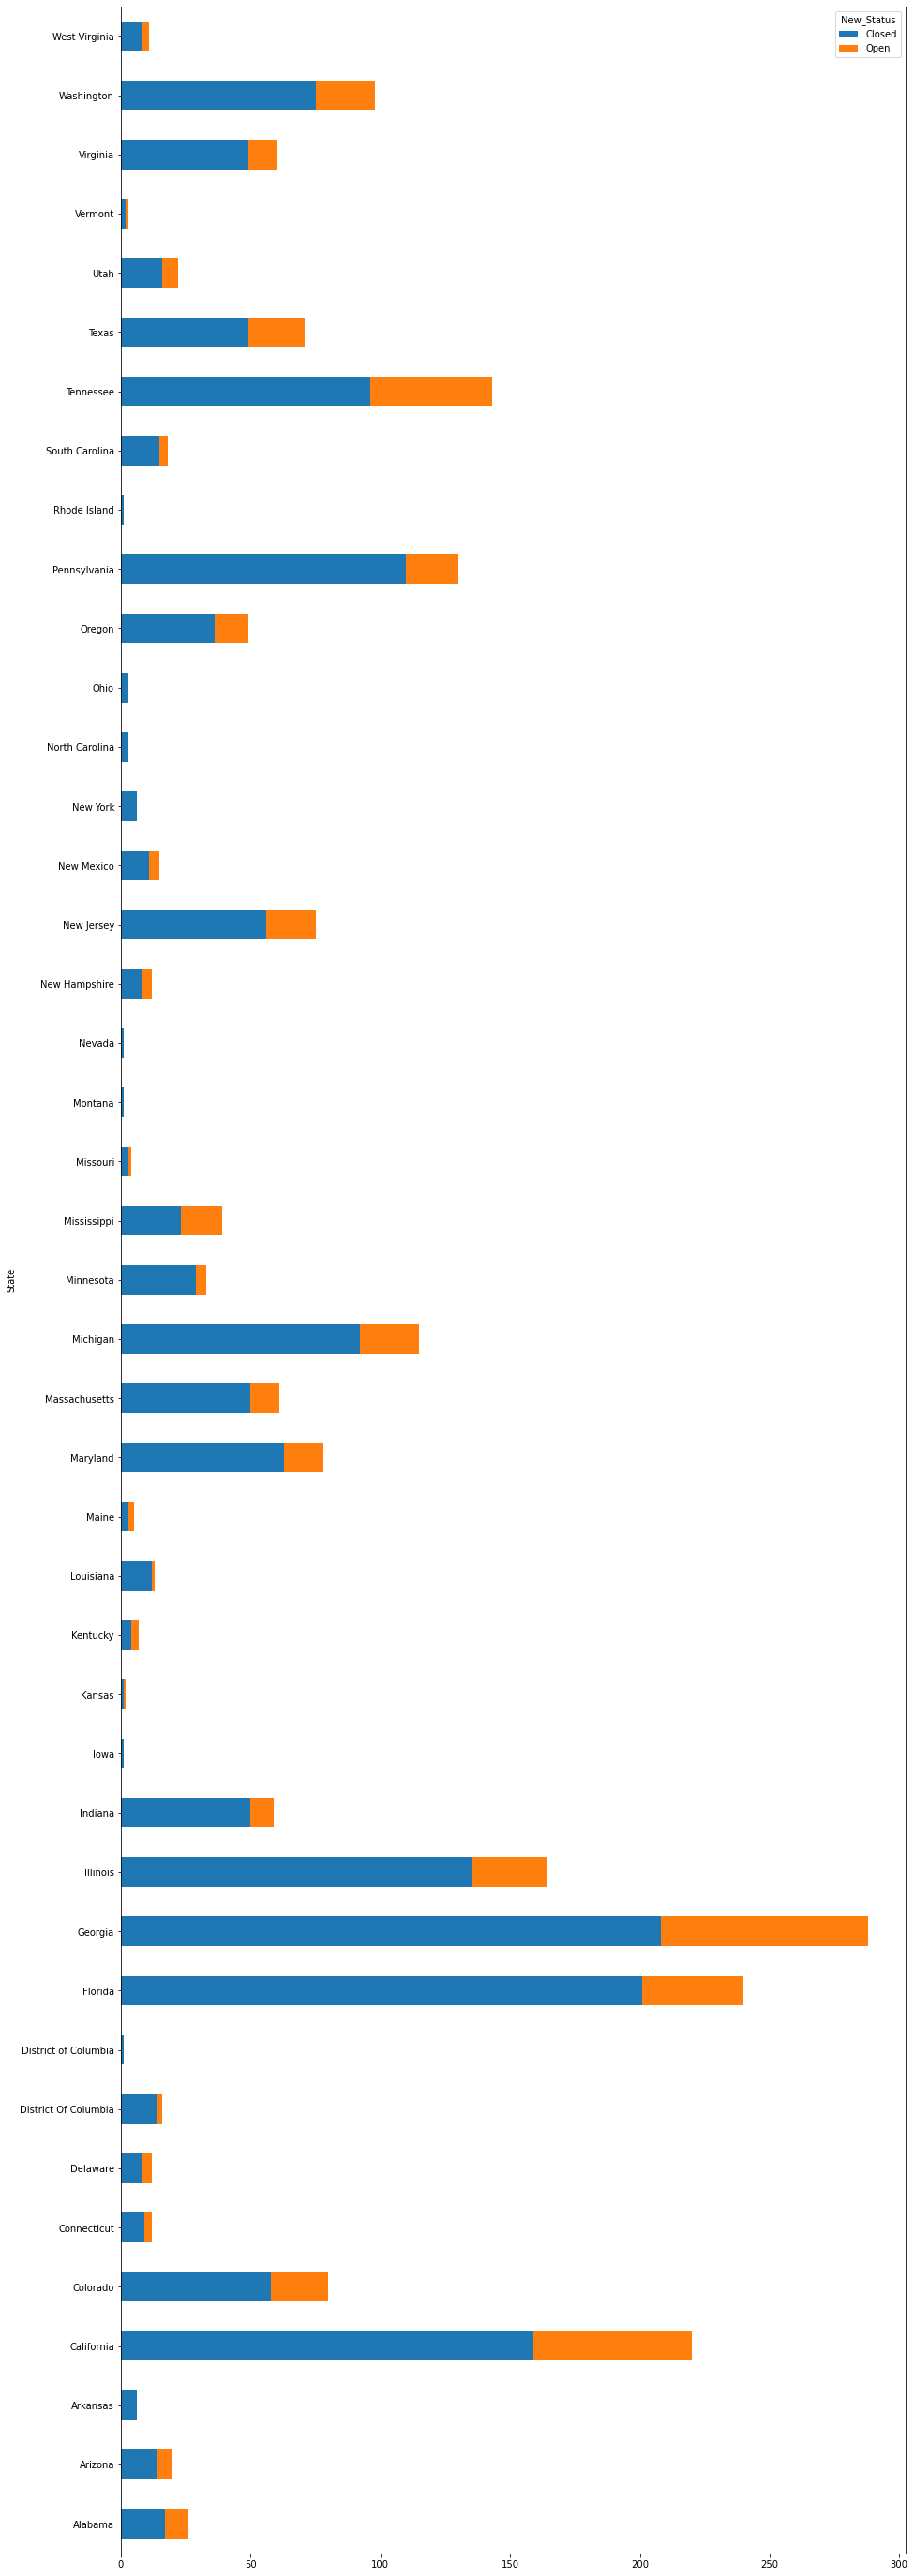

In [13]:
Status_complaints.plot(kind="barh",figsize=(15,50),stacked=True)

# Checking for complaint types which is maximum i.e. around internet, network issues, billing , etc etc 

In [14]:
comm[comm['Customer Complaint'].str.contains('speed',case=False)].shape[0]/len(comm['Customer Complaint'])

0.08633093525179857

In [15]:
def get_keyword(topic):
    return (comm[comm['Customer Complaint'].str.contains(topic,case=False)].shape[0]/len(comm['Customer Complaint']))*100


In [16]:
get_keyword('network')

0.08992805755395684

In [17]:
get_keyword('speed')

8.633093525179856

In [18]:
get_keyword('bill')

17.04136690647482

In [19]:
get_keyword('internet')

23.92086330935252

In [20]:
comm_new = comm.groupby(['State','New_Status'])['Ticket #'].count().unstack().fillna(0)
comm_new.head()

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


In [21]:
comm_new.describe()

New_Status,Closed,Open
count,43.000000,43.000000
mean,39.697674,12.023256
std,53.359310,17.252313
min,1.000000,0.000000
25%,3.500000,1.000000
50%,14.000000,4.000000
75%,53.000000,17.500000
max,208.000000,80.000000


In [22]:
comm_new['Total'] = comm_new['Open']+comm_new['Closed']
comm_new.head(3)

New_Status,Closed,Open,Total
State,,,
Alabama,17.0,9.0,26.0
Arizona,14.0,6.0,20.0
Arkansas,6.0,0.0,6.0


In [23]:
#Since max() for the Open complaints which are technically unresolved is 80 
comm_new[comm_new['Open']==80]

New_Status,Closed,Open,Total
State,,,
Georgia,208.0,80.0,288.0


In [24]:
print(comm_new['Total'].max())
comm_new[comm_new['Total']==288]

288.0


New_Status,Closed,Open,Total
State,,,
Georgia,208.0,80.0,288.0


In [25]:
comm_new['Unresolved Complaints %'] = (comm_new['Open']/comm_new['Total'])*100
comm_new.head()

New_Status,Closed,Open,Total,Unresolved Complaints %
State,,,,
Alabama,17.0,9.0,26.0,34.615385
Arizona,14.0,6.0,20.0,30.000000
Arkansas,6.0,0.0,6.0,0.000000
California,159.0,61.0,220.0,27.727273
Colorado,58.0,22.0,80.0,27.500000


In [26]:
print(comm_new['Unresolved Complaints %'].max())
comm_new[comm_new['Unresolved Complaints %']==50]

50.0


New_Status,Closed,Open,Total,Unresolved Complaints %
State,,,,
Kansas,1.0,1.0,2.0,50.0


## Creating Complaint Type data frame of 5 different types 

In [27]:
from sklearn.feature_extraction.text import CountVectorizer 

In [28]:
import nltk
import string

In [29]:
from nltk.corpus import stopwords
stop_list = stopwords.words('english')

In [30]:
stop_list.extend(['COMCAST','Comcast','comcast'])
stop_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
# Removal of punctuation and stopwords

def clean_words(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [ char for char in no_punc.lower().split() if char not in stop_list]
    

In [32]:
comm['Customer Complaint'].apply(clean_words)

0                               [cable, internet, speeds]
1        [payment, disappear, service, got, disconnected]
2                                        [speed, service]
3       [imposed, new, usage, cap, 300gb, punishes, st...
4                                [working, service, boot]
                              ...                        
2219                              [service, availability]
2220                  [monthly, billing, returned, modem]
2221                                          [complaint]
2222                   [extremely, unsatisfied, customer]
2223                     [ypsilanti, mi, internet, speed]
Name: Customer Complaint, Length: 2224, dtype: object

In [33]:
# Token creation using count vectorizer
vectorizer = CountVectorizer(analyzer=clean_words,max_df=0.8,min_df=2,stop_words='english')


In [34]:
cvec_matrix = vectorizer.fit_transform(comm['Customer Complaint'])

In [35]:
cvec_matrix

<2224x605 sparse matrix of type '<class 'numpy.int64'>'
	with 5865 stored elements in Compressed Sparse Row format>

In [36]:
#LDA
from sklearn.decomposition import LatentDirichletAllocation

In [37]:
lda = LatentDirichletAllocation(n_components=5)

In [38]:
lda.fit(cvec_matrix)

LatentDirichletAllocation(n_components=5)

In [39]:
lda.components_

array([[2.19858338, 0.20002984, 2.19852089, ..., 5.1932855 , 0.20375615,
        0.2000152 ],
       [0.20001487, 0.20329035, 0.20328253, ..., 0.20006011, 3.3393424 ,
        0.20024751],
       [2.72043508, 1.1945901 , 1.19314458, ..., 0.20005634, 0.20059058,
        1.36034654],
       [3.67932897, 1.13975565, 0.20001574, ..., 2.20444665, 0.20030191,
        7.00077332],
       [0.2016377 , 0.26233405, 0.20503626, ..., 0.2021514 , 3.05600897,
        1.23861743]])

In [40]:
ctype1 = lda.components_[0]
ctype1

array([2.19858338e+00, 2.00029844e-01, 2.19852089e+00, 2.03507715e-01,
       1.35629006e+00, 1.19424710e+00, 2.00007248e-01, 2.00086377e-01,
       2.00006351e-01, 2.00467507e-01, 2.00004224e-01, 2.01268542e-01,
       2.00025407e-01, 2.00012594e-01, 2.00019780e-01, 2.00006666e-01,
       2.00005107e-01, 2.19788492e+00, 1.19970955e+00, 1.70846504e+01,
       3.26683839e-01, 2.00004970e-01, 2.00851062e-01, 2.00010160e-01,
       8.19668368e+00, 4.41946642e+00, 2.04726631e-01, 1.11981602e+01,
       2.05473878e-01, 2.19996051e+00, 2.00008055e-01, 2.00371984e-01,
       2.00867850e-01, 2.00016880e-01, 2.00015193e-01, 2.00014131e-01,
       2.00007104e-01, 2.00617423e-01, 1.69676555e+00, 2.00009363e-01,
       2.01182836e-01, 2.01104837e-01, 2.01991138e-01, 4.19757318e+00,
       1.19705094e+00, 2.19126195e+00, 3.20032949e+00, 3.19314496e+00,
       2.00006868e-01, 1.19479085e+00, 2.00012257e-01, 2.01458702e-01,
       2.00017128e-01, 2.19995789e+00, 2.02514813e-01, 2.00010462e-01,
      

In [41]:
ctype1_words = ctype1.argsort()[-10:]
ctype1_words

array([214, 524, 601, 410, 401,  70, 154, 286, 278, 489], dtype=int64)

In [42]:
for i in ctype1_words:
    print(vectorizer.get_feature_names()[i])

failure
switch
xfinity
price
poor
billing
customer
issues
internet
service


In [43]:
for i,complaint_type in enumerate(lda.components_):
    print([vectorizer.get_feature_names()[i]
    for i in complaint_type.argsort()[-10:]])

['failure', 'switch', 'xfinity', 'price', 'poor', 'billing', 'customer', 'issues', 'internet', 'service']
['unauthorized', 'incorrect', 'unable', 'contract', 'account', 'issue', 'bill', 'services', 'charges', 'billing']
['fraudulent', 'hbo', 'fees', 'usage', 'comcastxfinity', 'pricing', 'data', 'unfair', 'practices', 'billing']
['charging', 'comcasts', 'problems', 'business', 'service', 'throttling', 'complaint', 'caps', 'data', 'internet']
['charge', 'high', 'connection', 'cable', 'slow', 'speeds', 'data', 'cap', 'speed', 'internet']


In [44]:
# Frequency table for Complaint types
ctype_df = pd.DataFrame()
for i in range(0,5):
    ctype_arr = []
    column_text = ["Complaint Type1","Complaint Type2","Complaint Type3","Complaint Type4","Complaint Type5"]
    ctype = lda.components_[i]
    ctype_words = ctype.argsort()[-10:]
    for j in ctype_words: 
         ctype_arr.append(vectorizer.get_feature_names()[j])
    ctype_df[column_text[i]] =   ctype_arr

ctype_df

,Complaint Type1,Complaint Type2,Complaint Type3,Complaint Type4,Complaint Type5
0,failure,unauthorized,fraudulent,charging,charge
1,switch,incorrect,hbo,comcasts,high
2,xfinity,unable,fees,problems,connection
3,price,contract,usage,business,cable
4,poor,account,comcastxfinity,service,slow
5,billing,issue,pricing,throttling,speeds
6,customer,bill,data,complaint,data
7,issues,services,unfair,caps,cap
8,internet,charges,practices,data,speed
9,service,billing,billing,internet,internet
